
Optimized t2: 42.82741125499355
Optimized b: -4.499999999999976


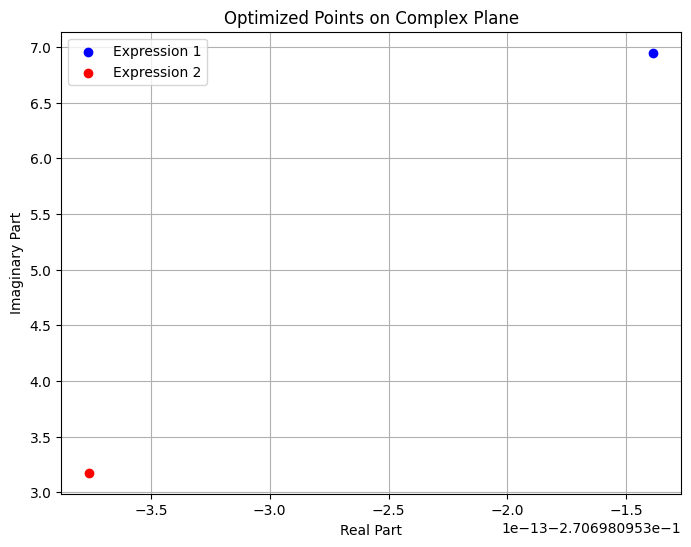

In [47]:
# Full Python Code including the final plot

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Fixed values for a, x, y, and t1
a = 3  # Example value for a
chi_ge = 0.75 *2*np.pi   # 
chi_ef = 0.25 *2*np.pi# Example value for y (different from x)
t1 = 0.5  # Example value for t1

print("")

# Function to calculate the difference of imaginary parts
def imaginary_difference(t2_b):
    t2, b = t2_b
    delta = a * np.sin(chi_ef*t1-chi_ge*t2) + b * np.sin(chi_ge*t2) - (a * -1* np.sin(chi_ge*t1-chi_ef*t2) + b * np.sin(chi_ef*t2))
    return -np.abs(delta)  # Negative because we want to maximize this value

# Constraint function for the real parts being equal
def real_parts_constraint(t2_b):
    t2, b = t2_b
    return a* np.cos(chi_ge * t1 - chi_ef * t2) + b * np.cos(chi_ef * t2) - (a * np.cos(chi_ef * t1 - chi_ge * t2) + b * np.cos(chi_ge  * t2))

# Additional constraints with weighted emphasis on b > a
def constraint_t2_positive(t2_b):
    t2, _ = t2_b
    return t2-0.2*t1  # t2 must be positive

def constraint_b_larger_than_a(t2_b):
    _, b = t2_b
    return (b+3*a) # Weighted constraint

def constraint_b_smaller_than_3a(t2_b):
    _, b = t2_b
    return -(b + a) # Weighted constraint

# Initial guess for t2 and b
initial_guess = [0.5, -2*a]

# Constraint dictionary with all constraints
constraints_with_weight = [
    {'type': 'eq', 'fun': real_parts_constraint},
    {'type': 'ineq', 'fun': constraint_t2_positive},
    {'type': 'ineq', 'fun': constraint_b_significantly_larger_than_a},
    {'type': 'ineq', 'fun': constraint_b_smaller_than_3a}
]

# Using a minimizer with constraints to find optimal t2 and b
result_with_weighted_constraints = minimize(imaginary_difference, initial_guess, constraints=constraints_with_weight, method='SLSQP')

# Extracting the optimal values for t2 and b with the weighted constraint
optimal_t2_weighted, optimal_b_weighted = result_with_weighted_constraints.x

# Functions for real and imaginary parts
def real_part_1(t2, b):
    return a * np.cos(chi_ge * t1 - chi_ef * t2) + b * np.cos(chi_ef * t2)

def imaginary_part_1(t2, b):
    return a * -1*np.sin(chi_ge * t1 - chi_ef * t2) + b * np.sin(chi_ef * t2)

def real_part_2(t2, b):
    return a * np.cos(chi_ef * t1 - chi_ge * t2) + b * np.cos(chi_ge * t2)

def imaginary_part_2(t2, b):
    return a * np.sin(chi_ef * t1 - chi_ge * t2) - b * np.sin(chi_ge * t2)

# Calculate the real and imaginary parts for the two expressions at the optimized values
optimized_real_part_1 = real_part_1(optimal_t2_weighted, optimal_b_weighted)
optimized_imaginary_part_1 = imaginary_part_1(optimal_t2_weighted, optimal_b_weighted)

optimized_real_part_2 = real_part_2(optimal_t2_weighted, optimal_b_weighted)
optimized_imaginary_part_2 = imaginary_part_2(optimal_t2_weighted, optimal_b_weighted)

# Printing the optimized values
print('Optimized t2:', optimal_t2_weighted)
print('Optimized b:', optimal_b_weighted)

# Plotting the optimized points on the complex plane
plt.figure(figsize=(8, 6))
plt.scatter(optimized_real_part_1, optimized_imaginary_part_1, color='blue', label='Expression 1')
plt.scatter(optimized_real_part_2, optimized_imaginary_part_2, color='red', label='Expression 2')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Optimized Points on Complex Plane')
plt.legend()
plt.grid(True)
plt.show()

## Keep b fixed


Optimized t2: -0.00153730989203451


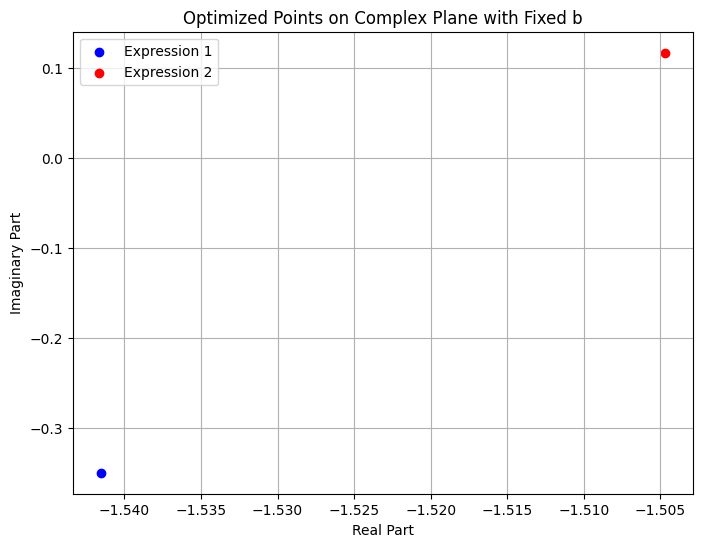

In [55]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Fixed values for a, x, y, and t1
a = 1.5  # Example value for a
chi_ge = 0.075 * 2 * np.pi  # 
chi_ef = 0.025 * 2 * np.pi  # Example value for y (different from x)
t1 = 0.5  # Example value for t1

# Fixed value for b
fixed_b = -2*a  # Example fixed value

# Function to calculate the difference of imaginary parts (only t2 is variable)
def imaginary_difference(t2):
    delta = a * np.sin(chi_ef * t1 - chi_ge * t2) + fixed_b * np.sin(chi_ge * t2) - (a * -1 * np.sin(chi_ge * t1 - chi_ef * t2) + fixed_b * np.sin(chi_ef * t2))
    return -np.abs(delta)

# Constraint function for the real parts being equal (only t2 is variable)
def real_parts_constraint(t2):
    return a * np.cos(chi_ge * t1 - chi_ef * t2) + fixed_b * np.cos(chi_ef * t2) - (a * np.cos(chi_ef * t1 - chi_ge * t2) + fixed_b * np.cos(chi_ge * t2))

# Constrains t2 should be atleast half of t1 and smaller than 1/4*chi (max evolution is one quadrant)

def constraint_t2_positive(t2):
    return t2 - 0.2 * t1

def constraint_t2_less_than_1over4chi(t2):
    return 1/(4*chi_ge) - t2

constrains = [
    {'type': 'eq', 'fun': real_parts_constraint},
    {'type': 'ineq', 'fun': constraint_t2_positive},
    {'type': 'ineq', 'fun': constraint_t2_less_than_1over4chi}
]




# Initial guess for t2
initial_guess_t2 = 0.5

# Using a minimizer with constraints to find optimal t2
result = minimize(imaginary_difference, initial_guess_t2, constraints=constrains,
                  method='SLSQP')

# Extracting the optimal value for t2
optimal_t2 = result.x[0]

# Functions for real and imaginary parts with

def real_part_1(t2):
    return a * np.cos(chi_ge * t1 - chi_ef * t2) + fixed_b * np.cos(chi_ef * t2)

def imaginary_part_1(t2):
    return a * -1 * np.sin(chi_ge * t1 - chi_ef * t2) + fixed_b * np.sin(chi_ef * t2)

def real_part_2(t2):
    return a * np.cos(chi_ef * t1 - chi_ge * t2) + fixed_b * np.cos(chi_ge * t2)

def imaginary_part_2(t2):
    return a * np.sin(chi_ef * t1 - chi_ge * t2) - fixed_b * np.sin(chi_ge * t2)

# Calculate the real and imaginary parts for the two expressions at the optimized t2 value
optimized_real_part_1 = real_part_1(optimal_t2)
optimized_imaginary_part_1 = imaginary_part_1(optimal_t2)

optimized_real_part_2 = real_part_2(optimal_t2)
optimized_imaginary_part_2 = imaginary_part_2(optimal_t2)

# Printing the optimized value
print('Optimized t2:', optimal_t2)

# Plotting the optimized points on the complex plane
plt.figure(figsize=(8, 6))
plt.scatter(optimized_real_part_1, optimized_imaginary_part_1, color='blue', label='Expression 1')
plt.scatter(optimized_real_part_2, optimized_imaginary_part_2, color='red', label='Expression 2')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Optimized Points on Complex Plane with Fixed b')
plt.legend()
plt.grid(True)
plt.show()

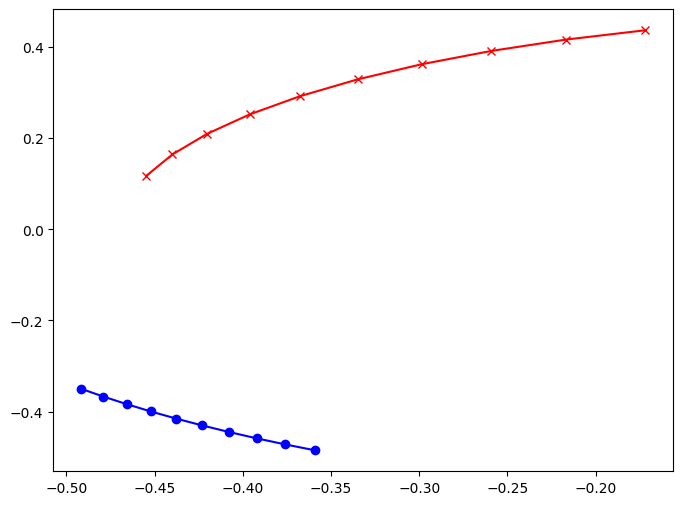

In [65]:
# Fixed values for a, x, y, and t1
a = 1.5  # Example value for a
chi_ge = 0.075 * 2 * np.pi  # 
chi_ef = 0.025 * 2 * np.pi  # Example value for y (different from x)
t1 = 0.5  # Example value for t1

# Fixed value for b
fixed_b = -1.3*a  # Example fixed value


# plot the trajectory of both points for a t2 sweep
t2_sweep = np.linspace(0, 2, 10)
real_part_1_sweep = real_part_1(t2_sweep)
imaginary_part_1_sweep = imaginary_part_1(t2_sweep)

real_part_2_sweep = real_part_2(t2_sweep)
imaginary_part_2_sweep = imaginary_part_2(t2_sweep)

plt.figure(figsize=(8, 6))
plt.plot(real_part_1_sweep, imaginary_part_1_sweep, color='blue', label='Expression 1', marker = "o")
plt.plot(real_part_2_sweep, imaginary_part_2_sweep, color='red', label='Expression 2', marker = "x")
